# K Neighbors Classifier

## 一. KNN 算法介绍

近邻分析法的基本思想是：为预测样本观测𝑿_𝟎输出变量𝒚_𝟎的取值:  
在训练集中找到与𝑿_𝟎相似的若干个（如𝑲个）样本观测，记为(𝑿_𝟏,𝑿_𝟐,…,𝑿_𝑲)。这些样本观测称为𝑿_𝟎的近邻  
对近邻(𝑿_𝟏,𝑿_𝟐,…,𝑿_𝑲)的输出变量(𝒚_𝟏,𝒚_𝟐,…,𝒚_𝑲)，计算诸如算术平均值（或加权均值或中位数或众数），并以此作为样本观测𝑿_𝟎输出变量取值𝒚_𝟎的预测值𝒚 ̂_𝟎  
近邻分析并不需要假定输入变量和输出变量间关系的具体形式，只需指定𝒚 ̂_𝟎是(𝒚_𝟏,𝒚_𝟐,…,𝒚_𝑲)的函数𝒚 ̂_𝟎=𝒇(𝒚_𝟏,𝒚_𝟐,...𝒚_𝒌)  


## 二. KNN 算法实现

### 2.1 导入相关模块

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 数据准备

#### 2.1.1 训练数据

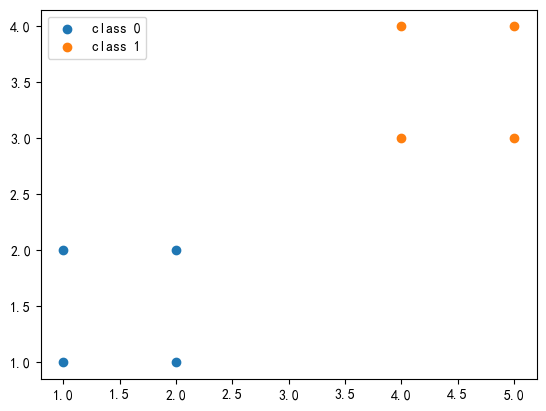

In [12]:
data = np.array([(1,1),(2,1),(1,2),(2,2),(4,3),(5,3),(4,4),(5,4)])
target = [0,0,0,0,1,1,1,1]
plt.scatter(data[0:4,0],data[0:4,1], label="class 0")
plt.scatter(data[4:,0],data[4:,1], label="class 1")
plt.legend()

#### 2.1.2 测试数据

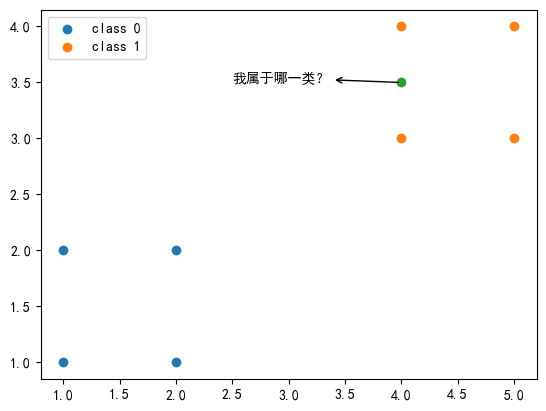

In [13]:
test_data = (4,3.5)

data = np.array([(1,1),(2,1),(1,2),(2,2),(4,3),(5,3),(4,4),(5,4)])
target = [0,0,0,0,1,1,1,1]
plt.scatter(data[:4,0],data[:4,1], label="class 0")
plt.scatter(data[4:,0],data[4:,1], label="class 1")
plt.scatter(4, 3.5)
plt.annotate("我属于哪一类？",(4,3.5),(2.5,3.5),arrowprops=dict(arrowstyle="<-"))
plt.legend()

### 2.2 算法实现

In [14]:
# 测试样本：(4,3.5)
# 训练数据：被打标记的数据

# KNN算法流程
# 测试样本点到训练数据的距离；如：(1,100),(2,200),(3,150),(4,10),(5,1),(6,20)
# 选择最近的k个点，统计k个点的类别；如：[1,1,0] => [1,2] 最近的三个点中，属于类别0的有一个，属于类别1的有两个;
# 选择类别数量最多的；如：计算最大值的索引，即类别id
def knn(data, target, test_point, k):

    distance_i_list = []

    # 计算待分类样本点到各点的欧氏距离
    for i in range(len(data)):
        distance = np.sqrt(np.sum((np.array(data[i]) - np.array(test_point))**2))  # 欧式距离 5, 4
        distance_i = (distance, i)   # (5,0)  (4,1)
        distance_i_list.append(distance_i) 
    
    
    # 根据距离排序   （距离，点index）
    distance_i_sorted = sorted(distance_i_list)

    # k个近邻，根据距离排序（距离，点index）
    distance_i_top = distance_i_sorted[:k]

    # distance_id_top_df = pd.DataFrame(distance_i_top,columns=["distance","i"])
    # labels = distance_id_top_df['i']

    # 近邻的index
    indexes = np.array(distance_i_top)[:,1] # 近邻的index

    print(indexes)
    # 根据近邻的index，查询近邻的真实target
    target_series = pd.Series(target)
    y = target_series[list(indexes)]

    print(y)

    # 查询类别的众数
    yhat = np.bincount(y.values)

    print(yhat)
    return yhat[0]

### 2.3 数据分类 

In [15]:
knn(data, target, (4,3.5),5)

[4. 6. 5. 7. 3.]
4    1
6    1
5    1
7    1
3    0
dtype: int64
[1 4]


1

## 三. 基于k-NN的北京空气质量数据预测

### 3.1 导入的相关模块

In [16]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import train_test_split

### 3.2 数据预处理

In [17]:
data=pd.read_excel('./data/北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
X=data.loc[:,['PM2.5','PM10','SO2','CO','NO2','O3']]
Y=data.loc[:,'质量等级']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123) # 数据集拆分为训练集和测试集

In [18]:
# 训练数据集大小
Ntrain=len(Y_train)
Ntrain

1467

### 3.3 K值的选取

In [19]:
# 指定近邻占比率为20%，即K的最大取值为样本量的20%，这里为291。   
K=np.arange(1,int(Ntrain*0.20),10)
K

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])

### 3.4 基于k-NN的北京空气质量数据预测

[0.8934817170111288, 0.9173290937996821, 0.9030206677265501, 0.8918918918918919, 0.8823529411764706, 0.8728139904610492, 0.8553259141494436, 0.8521462639109698, 0.8521462639109698, 0.8426073131955485, 0.8378378378378378, 0.8362480127186009, 0.8314785373608903, 0.8282988871224165, 0.8267090620031796, 0.8187599364069952, 0.8187599364069952, 0.809220985691574, 0.8076311605723371, 0.8012718600953895, 0.7980922098569158, 0.7917329093799682, 0.7853736089030207, 0.7821939586645469, 0.7774244833068362, 0.7726550079491256, 0.7710651828298887, 0.7678855325914149, 0.7694753577106518, 0.7694753577106518]


Text(0.5, 1.0, '加权K-近邻的测试精度(1-测试误差)变化折线图\n(最优参数K=11)')

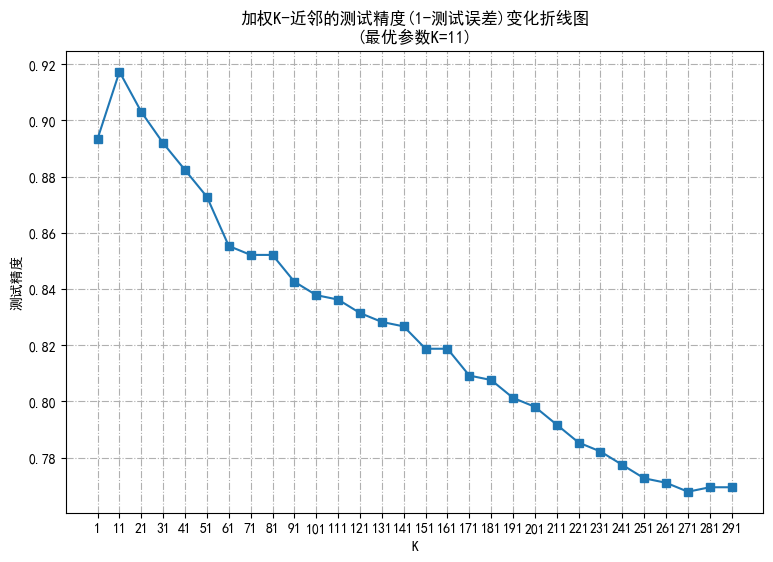

In [20]:
testPre=[]
for k in K:
    modelKNN=neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    modelKNN.fit(X_train,Y_train)
    testPre.append(modelKNN.score(X_test,Y_test))

print(testPre)    
plt.figure(figsize=(9,6))
plt.grid(True, linestyle='-.')
plt.xticks(K)

plt.plot(K,testPre, marker='s')
plt.xlabel("K")
plt.ylabel("测试精度")
bestK=K[testPre.index(np.max(testPre))]
plt.title("加权K-近邻的测试精度(1-测试误差)变化折线图\n(最优参数K=%d)"%bestK)

说明：利用北京市空气质量监测数据，采用K-近邻法对空气质量等级进行预测。    
1、采用加权K-近邻法，采用倒数加权。    
2、应依据训练误差确定K-近邻法关键参数K，这里采用旁置法计算。指定训练集占70%，测试集占30%。 （旁置法：将整个样本集随机划分为训练样本集和测试样本集。）  
3、K-近邻参数K的取值范围，从1-近邻开始，每次增加10个步长。指定近邻占比率为20%，K的最大取值为样本量的20%，这里为291。    
4、从右向左观察精度曲线。随近邻个数K从最大值291开始逐步减少，模型复杂度不断增加，测试精度呈先上升后下降，也即测试误差呈先下降后上升的形态。当K=11时测试精度最高，测试误差最小。K小于11后测试精度下降误差上升，表明出现了模型过拟合。因此参数K不能小于11，最优值应设置为11。    

> 参考自：Python机器学习：数据建模与分析 作者：薛薇 等